In [1]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('sydney_rain prediction.xlsx')

# droping the columns

df = df.drop(['Date', 'Location'], axis = 1)

# Replacing categorical value to numerical values

df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

# identifying the outlier values.

outlier = {}
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    if min(df[col]) < lower or max(df[col]) > upper:
        outlier.update({col: [lower, upper]})

In [2]:
outlier

{'MaxTemp': [10.000000000000004, 35.599999999999994],
 'Rainfall': [-2.0999999999999996, 3.4999999999999996],
 'Evaporation': [-2.499999999999999, 12.7],
 'Humidity9am': [25.0, 113.0],
 'Humidity3pm': [12.5, 96.5],
 'Pressure9am': [999.6000000000001, 1037.2],
 'Pressure3pm': [997.05, 1035.05],
 'Temp9am': [1.9500000000000028, 33.55],
 'Temp3pm': [9.249999999999996, 33.650000000000006]}

In [3]:
# removing outliers

filtered_df = df[
    (df['MaxTemp'] < 10.0) | (df['MaxTemp'] > 35.5) &
    (df['Rainfall'] < -2.09) | (df['Rainfall'] > 3.4) &
    (df['Evaporation'] < -2.4) | (df['Evaporation'] > 12.7) &
    (df['Humidity9am'] < 25.0) | (df['Humidity9am'] > 113.0) &
    (df['Humidity3pm'] < 12.5) | (df['Humidity3pm'] > 96.5) &
    (df['Pressure9am'] < 999.60) | (df['Pressure9am'] > 1037.2) &
    (df['Pressure3pm'] < 997.05) | (df['Pressure3pm'] > 1035.05) &
    (df['Temp9am'] < 1.95) | (df['Temp9am'] > 33.55) &
    (df['Temp3pm'] < 9.24) | (df['Temp3pm'] > 33.65)
]

df = df.drop(filtered_df.index)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1.0,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1.0,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1.0,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1.0,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0.0,0
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0.0,0
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0.0,0
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0.0,0


In [4]:
# identifying for null value

df.isna().any()

MinTemp          True
MaxTemp          True
Rainfall         True
Evaporation      True
Sunshine         True
Humidity9am      True
Humidity3pm      True
Pressure9am      True
Pressure3pm      True
Cloud9am         True
Cloud3pm         True
Temp9am          True
Temp3pm          True
RainToday        True
RainTomorrow    False
dtype: bool

In [5]:
# Removing null values

import numpy as np

for col in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']:
    df[col] = df[col].fillna(round(df[col].mean(), 1))

for col in ['Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday']:
    df[col] = df[col].fillna(int(df[col].mean()))

In [6]:
# checking for null value

df.isna().any()

MinTemp         False
MaxTemp         False
Rainfall        False
Evaporation     False
Sunshine        False
Humidity9am     False
Humidity3pm     False
Pressure9am     False
Pressure3pm     False
Cloud9am        False
Cloud3pm        False
Temp9am         False
Temp3pm         False
RainToday       False
RainTomorrow    False
dtype: bool

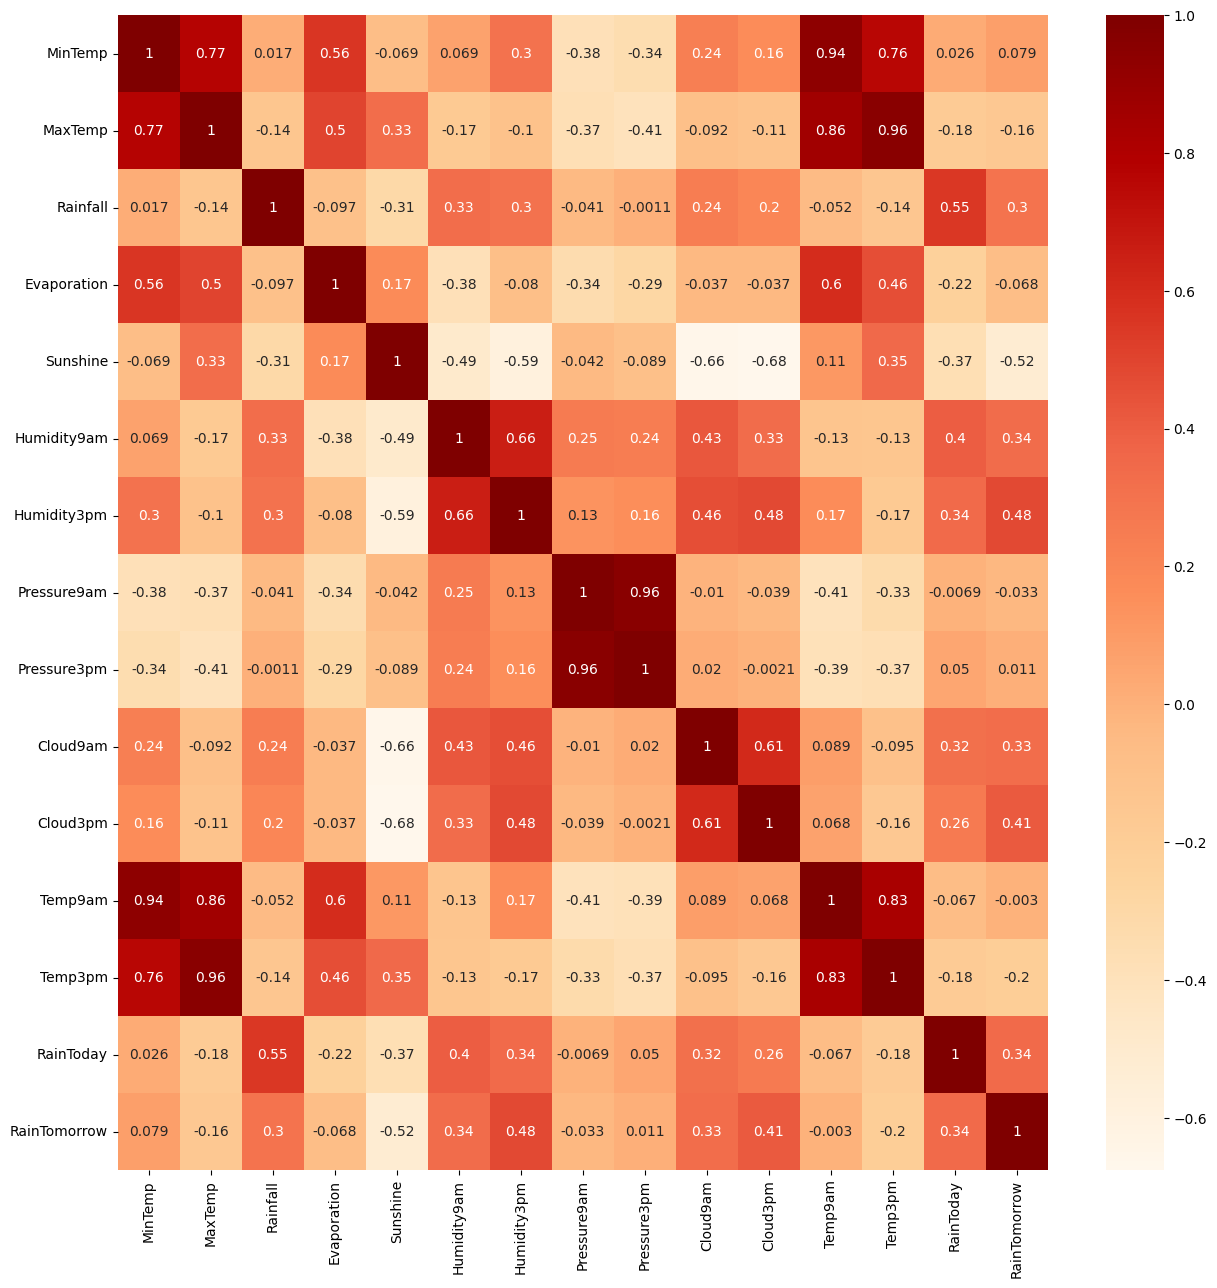

In [7]:
# Correlation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
g=sns.heatmap(df.corr(), annot=True, cmap='OrRd')

In [8]:
# Spliting the dataset before feature selection

label = df['RainTomorrow']
features = df.drop(['RainTomorrow', 'RainToday'], axis = 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 1)

In [9]:
# Scaling the features before feature selection

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
train_scaled = scale.fit_transform(x_train)
test_scaled = scale.fit_transform(x_test)

SequentialFeatureSelector(SFS) is a feature selection technique used in ML to find the best subset of features from a given set of features. It works
by iteratively selecting or deselecting features based on a predefined criterion, such as model performance or some other scoring metric. SFS comes in two main flavors forward selection and backward elimination.

If direction = 'forward' then it will start from 1 features and will continue with all combination to identify the best features selection.

If direction = 'backward' then it will start removing the features which is not required for the model building.

In [10]:
# For feature selection using sequentialfeatureselector in forward direction

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

sfs = SequentialFeatureSelector(RandomForestClassifier(), scoring = 'accuracy', direction = 'forward')
sfs.fit(train_scaled, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          scoring='accuracy')

In [11]:
# Getting the feature names

np.array(x_train.columns)[sfs.get_support()]

array(['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Temp9am'], dtype=object)

In [12]:
# Spliting the dataset after feature selection

label = df['RainTomorrow']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features[['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Temp9am']], label, test_size = 0.2, random_state = 1)

In [13]:
# Scaling the features after feature selection

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
train_scaled = scale.fit_transform(x_train)
test_scaled = scale.fit_transform(x_test)

In [14]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3, random_state = 1)
tree.fit(train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

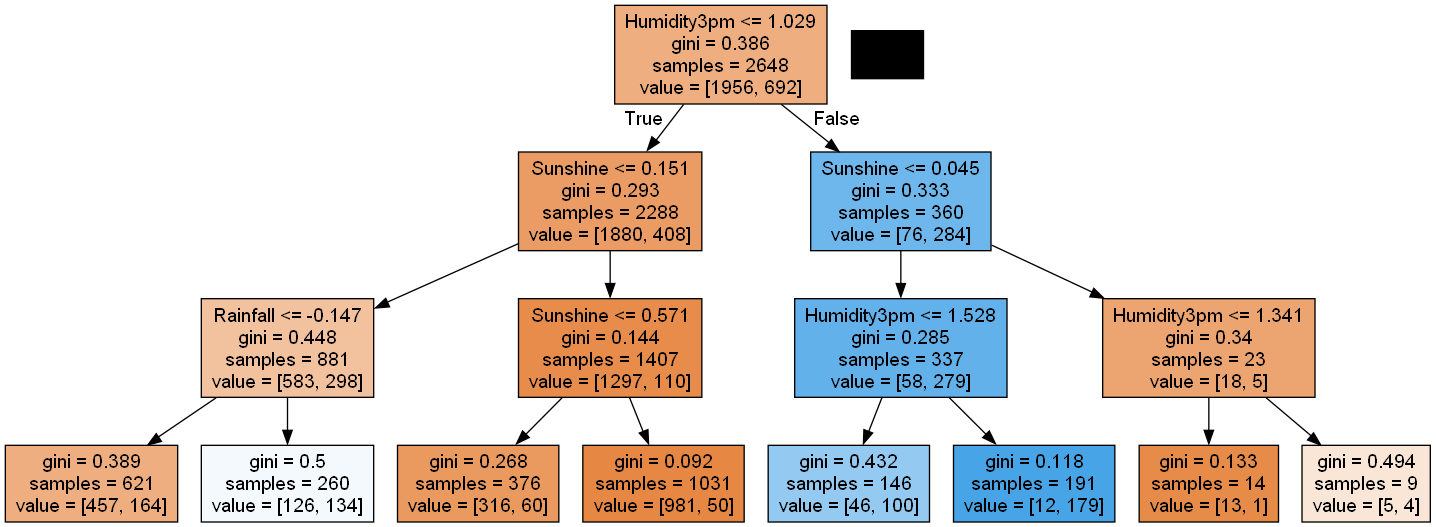

In [15]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus

# Generate the DOT data for visualization
dot_data = export_graphviz(tree, out_file=None, filled=True, feature_names = ['Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm',
       'Pressure3pm', 'Temp9am'])
graph = pydotplus.graph_from_dot_data(dot_data)

# Create and display the image
Image(graph.create_png())


In [16]:
# Evaluation for decision tree

from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, tree.predict(test_scaled))

array([[445,  51],
       [ 71,  95]], dtype=int64)

In [17]:
accuracy_score(y_test, tree.predict(test_scaled))

0.8157099697885196

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, tree.predict(test_scaled))

0.7347332879906724

In [19]:
# Bagging on Decision tree 

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(estimator = tree, n_estimators = 170, random_state = 1)
bc.fit(train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
                  n_estimators=170, random_state=1)

In [20]:
# Evaluating the bagging classifier using decision tree

print('Confusion Matrix for bagging classifier: \n',confusion_matrix(y_test, bc.predict(test_scaled)))
print('Accuracy Score: ', accuracy_score(y_test, bc.predict(test_scaled)))
print('roc_auc_score: ', roc_auc_score(y_test, bc.predict(test_scaled)))

Confusion Matrix for bagging classifier: 
 [[475  21]
 [ 84  82]]
Accuracy Score:  0.8413897280966768
roc_auc_score:  0.7258185969685191


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, bc.predict(test_scaled)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       496
           1       0.80      0.49      0.61       166

    accuracy                           0.84       662
   macro avg       0.82      0.73      0.76       662
weighted avg       0.84      0.84      0.83       662



In [22]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 130, max_depth = 3)
rf.fit(train_scaled, y_train)

RandomForestClassifier(max_depth=3, n_estimators=130)

In [23]:
# Evaluation for random forest

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report

confusion_matrix(y_test, rf.predict(test_scaled))

array([[480,  16],
       [ 88,  78]], dtype=int64)

In [24]:
accuracy_score(y_test, rf.predict(test_scaled))

0.8429003021148036

In [25]:
roc_auc_score(y_test, rf.predict(test_scaled))

0.7188107267780801

In [26]:
print(classification_report(y_test, rf.predict(test_scaled)))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       496
           1       0.83      0.47      0.60       166

    accuracy                           0.84       662
   macro avg       0.84      0.72      0.75       662
weighted avg       0.84      0.84      0.83       662



In [27]:
# Bagging on random forest

from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(estimator = rf, n_estimators = 200, random_state = 1)
bc.fit(train_scaled, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=3,
                                                   n_estimators=130),
                  n_estimators=200, random_state=1)

In [28]:
# Evaluating the bagging classifier using random forest

print('Confusion Matrix for bagging classifier : \n',confusion_matrix(y_test, bc.predict(test_scaled)))
print('Accuracy Score: ', accuracy_score(y_test, bc.predict(test_scaled)))
print('roc_auc_score: ', roc_auc_score(y_test, bc.predict(test_scaled)))

Confusion Matrix for bagging classifier : 
 [[477  19]
 [ 89  77]]
Accuracy Score:  0.8368580060422961
roc_auc_score:  0.7127744850369219


In [29]:
print(classification_report(y_test, bc.predict(test_scaled)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       496
           1       0.80      0.46      0.59       166

    accuracy                           0.84       662
   macro avg       0.82      0.71      0.74       662
weighted avg       0.83      0.84      0.82       662



In [30]:
# Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 120, learning_rate = 0.02)
gbc.fit(train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=120)

In [31]:
# evaluation on boosting

confusion_matrix(y_test, gbc.predict(test_scaled))

array([[477,  19],
       [ 86,  80]], dtype=int64)

In [32]:
accuracy_score(y_test, gbc.predict(test_scaled))

0.8413897280966768

In [33]:
roc_auc_score(y_test, gbc.predict(test_scaled))

0.7218106296152351